<a href="https://colab.research.google.com/github/asrianda/GIS/blob/main/lat2/A5_reading_excel_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
from geopandas import datasets, read_file,GeoDataFrame

In [2]:
nama='lsm.zip'
kota=gpd.read_file(nama)
kota.head()

,KDPPUM,NAMOBJ,REMARK,KDPBPS,FCODE,LUASWH,UUPP,SRS_ID,LCODE,METADATA,KDEBPS,KDEPUM,KDCBPS,KDCPUM,KDBBPS,KDBPUM,WADMKD,WIADKD,WADMKC,WIADKC,WADMKK,WIADKK,WADMPR,WIADPR,TIPADM,SHAPE_Leng,SHAPE_Area,geometry
0,None,BANDASAKTI,Wilayah Administrasi Kecamatan,None,None,0.0,None,None,BA0080,None,None,None,None,None,None,None,None,None,None,None,LHOKSEUMAWE,None,ACEH,None,0,0.162595,0.000888,"POLYGON Z ((97.13359 5.17511 0.00000, 97.13327..."
1,None,BLANGMANGAT,Wilayah Administrasi Kecamatan,None,None,0.0,None,None,BA0080,None,None,None,None,None,None,None,None,None,None,None,LHOKSEUMAWE,None,ACEH,None,0,0.474378,0.003945,"POLYGON Z ((97.09851 5.16797 0.00000, 97.09845..."
2,None,MUARA DUA,Wilayah Administrasi Kecamatan,None,None,0.0,None,None,BA0080,None,None,None,None,None,None,None,None,None,None,None,LHOKSEUMAWE,None,ACEH,None,0,0.298543,0.002193,"POLYGON Z ((97.13359 5.17511 0.00000, 97.13349..."
3,None,MUARA SATU,Wilayah Administrasi Kecamatan,None,None,0.0,None,None,BA0080,None,None,None,None,None,None,None,None,None,None,None,LHOKSEUMAWE,None,ACEH,None,0,0.377833,0.004098,"POLYGON Z ((97.11641 5.21582 0.00000, 97.11612..."


<Axes: >

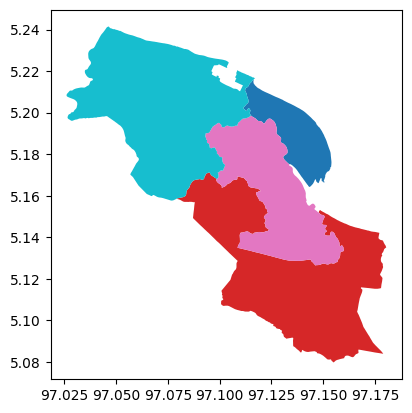

In [3]:
kota.plot(column='NAMOBJ')

In [11]:
#--pip install mapclassify
import mapclassify
kota.explore(column='NAMOBJ', tooltip='NAMOBJ',
             cmap='Set1', tiles='CartoDB positron',
             style_kwds=dict(color='white')
             )

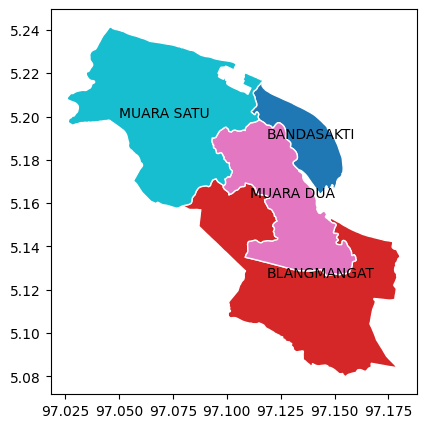

In [32]:
kota['coords']=kota['geometry'].apply(lambda x:
                                      x.representative_point().coords[:])
kota['coords']=[coords[0] for coords in kota['coords']]
fig, ax=plt.subplots(figsize=(5,5),)
kota.plot(ax=ax, column='NAMOBJ', categorical=True, edgecolor='white')
for idx, row in kota.iterrows():
  #plt.annotate(text=row['NAMOBJ'], xy=row['coords'],horizontalalignment= 'center', )
  plt.annotate(text=row["NAMOBJ"], xy=row["coords"], horizontalalignment="center", color="black")

In [33]:
kota.head()

,KDPPUM,NAMOBJ,REMARK,KDPBPS,FCODE,LUASWH,UUPP,SRS_ID,LCODE,METADATA,KDEBPS,KDEPUM,KDCBPS,KDCPUM,KDBBPS,KDBPUM,WADMKD,WIADKD,WADMKC,WIADKC,WADMKK,WIADKK,WADMPR,WIADPR,TIPADM,SHAPE_Leng,SHAPE_Area,geometry,coords
0,None,BANDASAKTI,Wilayah Administrasi Kecamatan,None,None,0.0,None,None,BA0080,None,None,None,None,None,None,None,None,None,None,None,LHOKSEUMAWE,None,ACEH,None,0,0.162595,0.000888,"POLYGON Z ((97.13359 5.17511 0.00000, 97.13327...","(97.13878000112307, 5.189917107000072)"
1,None,BLANGMANGAT,Wilayah Administrasi Kecamatan,None,None,0.0,None,None,BA0080,None,None,None,None,None,None,None,None,None,None,None,LHOKSEUMAWE,None,ACEH,None,0,0.474378,0.003945,"POLYGON Z ((97.09851 5.16797 0.00000, 97.09845...","(97.14351442874542, 5.125539651000041)"
2,None,MUARA DUA,Wilayah Administrasi Kecamatan,None,None,0.0,None,None,BA0080,None,None,None,None,None,None,None,None,None,None,None,LHOKSEUMAWE,None,ACEH,None,0,0.298543,0.002193,"POLYGON Z ((97.13359 5.17511 0.00000, 97.13349...","(97.13039716440599, 5.162575218500029)"
3,None,MUARA SATU,Wilayah Administrasi Kecamatan,None,None,0.0,None,None,BA0080,None,None,None,None,None,None,None,None,None,None,None,LHOKSEUMAWE,None,ACEH,None,0,0.377833,0.004098,"POLYGON Z ((97.11641 5.21582 0.00000, 97.11612...","(97.07127646868163, 5.1996040400000805)"


In [34]:
import pandas as pd
data=pd.read_excel('con_gisA5.xlsx')

In [35]:
data.head()

,NAMOBJ,keahlian_IT
0,BANDASAKTI,200
1,BLANGMANGAT,150
2,MUARA DUA,90
3,MUARA SATU,300


In [36]:
kota1=kota.merge(data, on='NAMOBJ')

In [37]:
kota1.head()

,KDPPUM,NAMOBJ,REMARK,KDPBPS,FCODE,LUASWH,UUPP,SRS_ID,LCODE,METADATA,KDEBPS,KDEPUM,KDCBPS,KDCPUM,KDBBPS,KDBPUM,WADMKD,WIADKD,WADMKC,WIADKC,WADMKK,WIADKK,WADMPR,WIADPR,TIPADM,SHAPE_Leng,SHAPE_Area,geometry,coords,keahlian_IT
0,None,BANDASAKTI,Wilayah Administrasi Kecamatan,None,None,0.0,None,None,BA0080,None,None,None,None,None,None,None,None,None,None,None,LHOKSEUMAWE,None,ACEH,None,0,0.162595,0.000888,"POLYGON Z ((97.13359 5.17511 0.00000, 97.13327...","(97.13878000112307, 5.189917107000072)",200
1,None,BLANGMANGAT,Wilayah Administrasi Kecamatan,None,None,0.0,None,None,BA0080,None,None,None,None,None,None,None,None,None,None,None,LHOKSEUMAWE,None,ACEH,None,0,0.474378,0.003945,"POLYGON Z ((97.09851 5.16797 0.00000, 97.09845...","(97.14351442874542, 5.125539651000041)",150
2,None,MUARA DUA,Wilayah Administrasi Kecamatan,None,None,0.0,None,None,BA0080,None,None,None,None,None,None,None,None,None,None,None,LHOKSEUMAWE,None,ACEH,None,0,0.298543,0.002193,"POLYGON Z ((97.13359 5.17511 0.00000, 97.13349...","(97.13039716440599, 5.162575218500029)",90
3,None,MUARA SATU,Wilayah Administrasi Kecamatan,None,None,0.0,None,None,BA0080,None,None,None,None,None,None,None,None,None,None,None,LHOKSEUMAWE,None,ACEH,None,0,0.377833,0.004098,"POLYGON Z ((97.11641 5.21582 0.00000, 97.11612...","(97.07127646868163, 5.1996040400000805)",300


<Axes: >

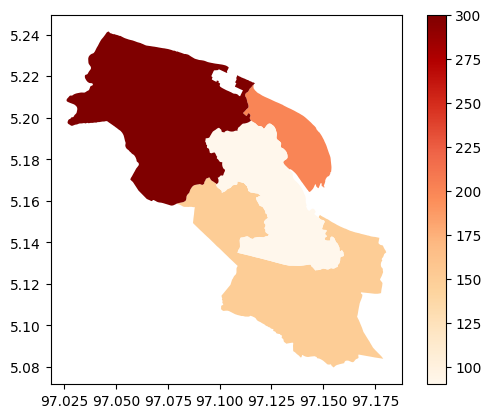

In [41]:
kota1.plot(column='keahlian_IT', cmap='OrRd', legend=True)

<Axes: >

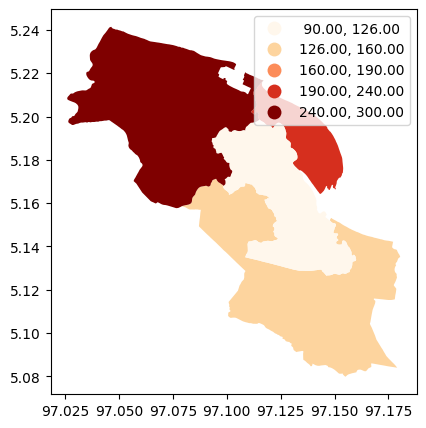

In [43]:
kota1.plot(column='keahlian_IT', scheme='quantiles', cmap='OrRd',
           legend=True, figsize=(5,5))

<Axes: >

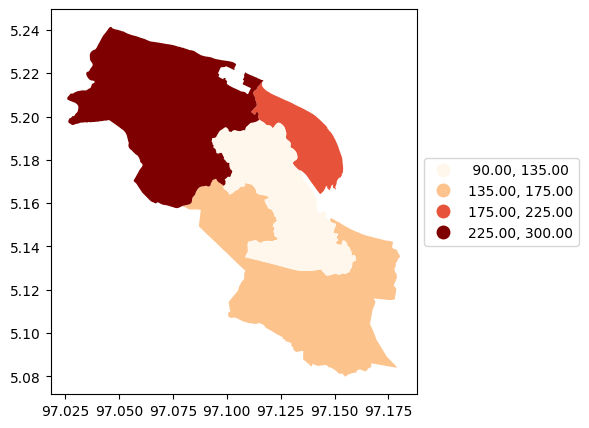

In [46]:
kota1.plot(column='keahlian_IT', scheme='quantiles', cmap='OrRd',
           legend=True, figsize=(5,5), k=4,
           legend_kwds={"loc": "center left", "bbox_to_anchor": (1, 0.5)})